<a href="https://colab.research.google.com/github/Balakartigeyan/2.2-KM-Conveyor-Industrial-Predictive-Maintenance/blob/main/Conveyor%20Export%20TR22%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform data cleaning and analysis on the motor current signals from the `TR22_Monitoring_CMA.csv` dataset, using contextual information from `Screenshot 2026-01-10 204418.png`. The process should include initial data inspection, visualization of raw data, identification and justification of non-physical values, application of filtering and cleaning techniques, and a visual comparison of raw and cleaned data. Conclude by summarizing sensor issues and providing a professional conclusion on data quality for condition monitoring, then output the cleaned dataset, the before-and-after trend comparison, the summary of sensor issues, and the professional conclusion.

## Load and Inspect Data

### Subtask:
Load the 'TR22_Monitoring_CMA.csv' dataset into a pandas DataFrame and perform an initial inspection to understand its structure, data types, and basic statistics. Additionally, acknowledge the provided 'Screenshot 2026-01-10 204418.png' for contextual information.


**Reasoning**:
First, I'll import the pandas library, load the specified CSV file into a DataFrame, and then display its head, info, and descriptive statistics to get an initial understanding of the data.



In [1]:
import pandas as pd

df = pd.read_csv('/content/TR22_Monitoring_CMA.csv')

print("First 5 rows of the DataFrame:")
print(df.head())

print("\nConcise summary of the DataFrame:")
df.info()

print("\nDescriptive statistics of the DataFrame:")
print(df.describe())

First 5 rows of the DataFrame:
                                  Data Source                        Time  \
0  \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT  2025-12-10 20:45:21.043014   
1  \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT  2025-12-10 20:45:51.027008   
2  \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT  2025-12-10 20:45:56.043014   
3  \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT  2025-12-10 20:46:21.054016   
4  \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT  2025-12-10 20:46:36.038009   

              Value  
0  43.7000007629395  
1  43.2999992370605  
2  43.9333343505859  
3  43.7000007629395  
4  42.2999992370605  

Concise summary of the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186104 entries, 0 to 186103
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Data Source  186104 non-null  object
 1   Time         186104 non-null  object
 2   Value        186104 non-null  object
dtypes: object(3)
m

## Initial Visualization of Raw Data

### Subtask:
Generate time-series plots for the raw motor current signals (M1, M2, M3) to visually assess their initial trends, variability, and potential anomalies. This visualization will serve as the 'Before' comparison.


**Reasoning**:
To visualize the raw data, I need to prepare the DataFrame by converting the 'Time' column to datetime objects, handling 'Calc Failed' values in the 'Value' column and converting it to numeric, extracting the 'Motor_ID', and then filtering for M1, M2, and M3 to plot their time-series data.



In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 2. Convert the 'Time' column to datetime objects, handling inconsistent formats
df['Time'] = pd.to_datetime(df['Time'], errors='coerce', format='mixed')

# 3. Replace 'Calc Failed' with NaN and convert 'Value' to numeric
df['Value'] = df['Value'].replace('Calc Failed', np.nan)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# 4. Extract the motor identifier from the 'Data Source' column
df['Motor_ID'] = df['Data Source'].str.extract(r'_(M\d+)_')[0]

# 5. Filter the DataFrame to include only M1, M2, or M3
motor_ids_to_plot = ['M1', 'M2', 'M3']
df_filtered_motors = df[df['Motor_ID'].isin(motor_ids_to_plot)].copy()

# 6. For each unique 'Motor_ID', create a separate time-series plot
for motor_id in motor_ids_to_plot:
    motor_df = df_filtered_motors[df_filtered_motors['Motor_ID'] == motor_id]

    plt.figure(figsize=(15, 6))
    plt.plot(motor_df['Time'], motor_df['Value'], label=f'Raw {motor_id} Signal')
    plt.title(f'Raw Current Signal for Motor {motor_id}', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Current Value', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

ValueError: time data "2025-12-11 02:38:21" doesn't match format "%Y-%m-%d %H:%M:%S.%f", at position 1825. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

**Reasoning**:
The previous code failed because some 'Time' column entries did not conform to a consistent datetime format. To handle these inconsistencies gracefully, I will use `errors='coerce'` to convert unparseable dates to `NaT` and `format='mixed'` to allow pandas to infer different formats for various entries in the 'Time' column.



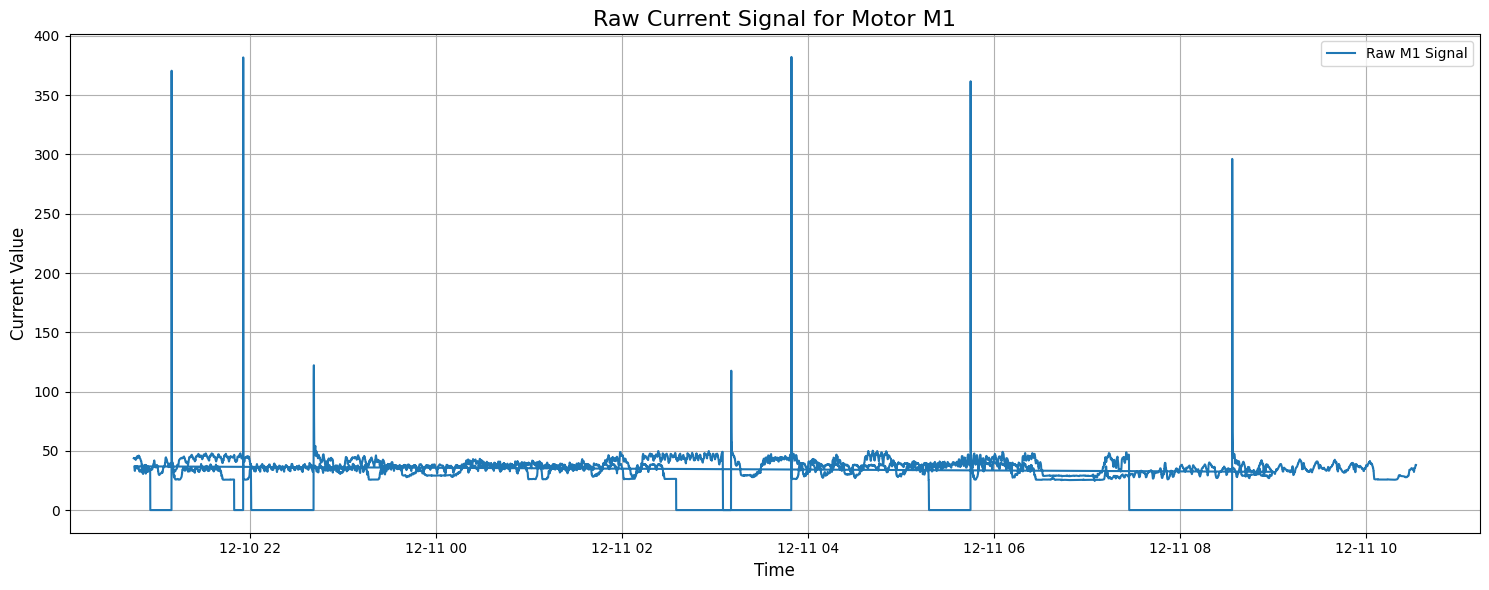

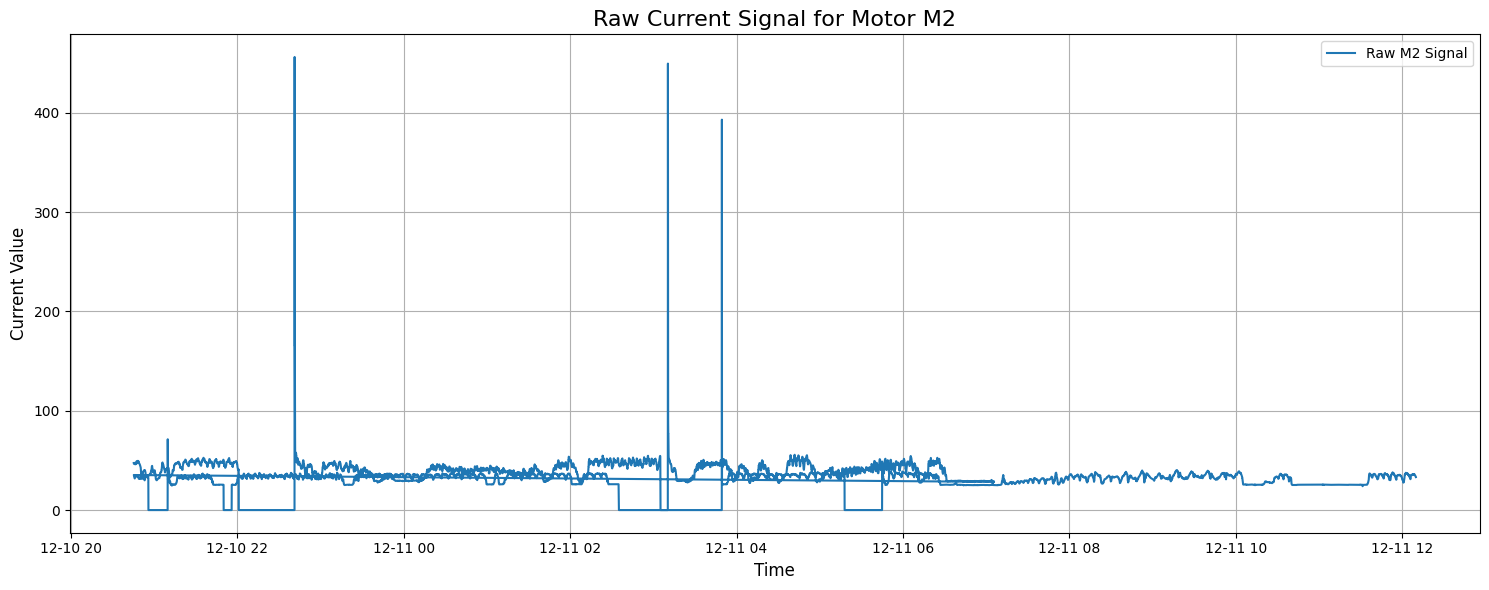

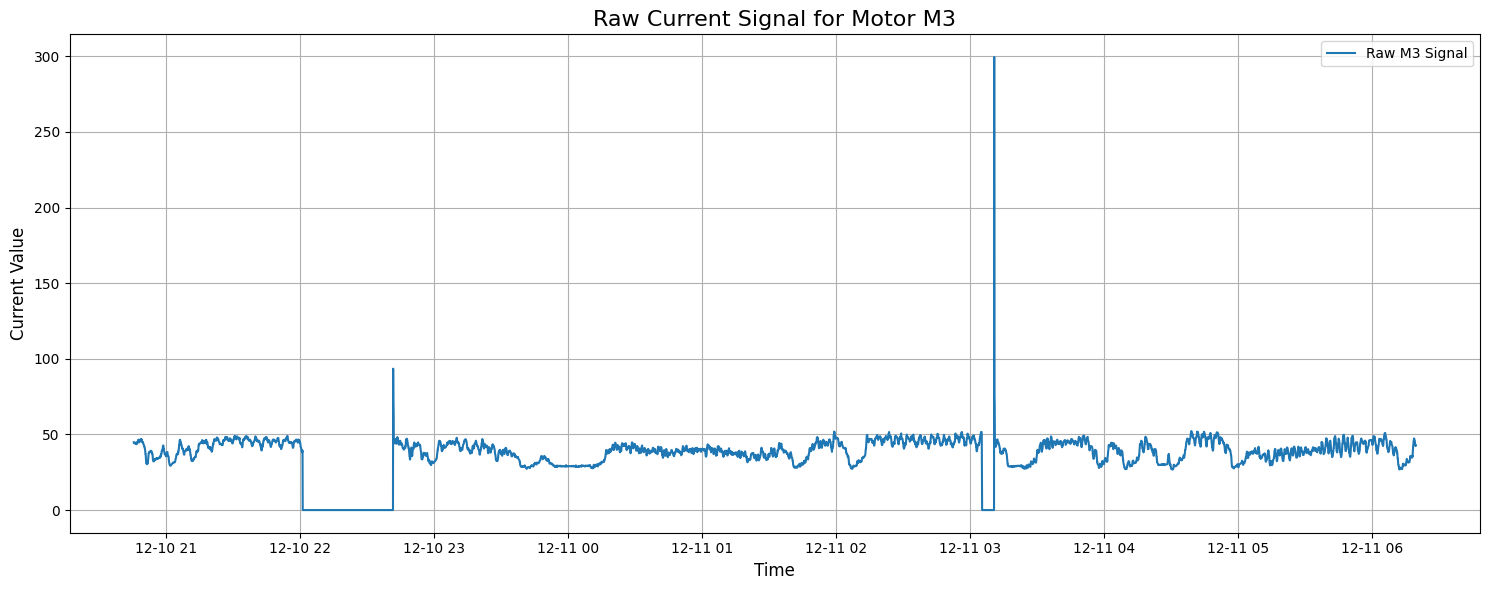

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 2. Convert the 'Time' column to datetime objects, handling inconsistent formats
df['Time'] = pd.to_datetime(df['Time'], errors='coerce', format='mixed')

# 3. Replace 'Calc Failed' with NaN and convert 'Value' to numeric
df['Value'] = df['Value'].replace('Calc Failed', np.nan)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# 4. Extract the motor identifier from the 'Data Source' column
df['Motor_ID'] = df['Data Source'].str.extract(r'_(M\d+)_')[0]

# 5. Filter the DataFrame to include only M1, M2, or M3
motor_ids_to_plot = ['M1', 'M2', 'M3']
df_filtered_motors = df[df['Motor_ID'].isin(motor_ids_to_plot)].copy()

# Drop rows where 'Time' or 'Value' is NaN after conversion to ensure plotability
df_filtered_motors.dropna(subset=['Time', 'Value'], inplace=True)

# 6. For each unique 'Motor_ID', create a separate time-series plot
for motor_id in motor_ids_to_plot:
    motor_df = df_filtered_motors[df_filtered_motors['Motor_ID'] == motor_id]

    plt.figure(figsize=(15, 6))
    plt.plot(motor_df['Time'], motor_df['Value'], label=f'Raw {motor_id} Signal')
    plt.title(f'Raw Current Signal for Motor {motor_id}', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Current Value', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

## Identify and Justify Non-Physical Values

### Subtask:
Systematically identify and document non-physical values in the current signals using engineering judgment. This includes: detecting zero-value dropouts (impossible for an operating motor), identifying impossible current spikes/dips that exceed physical motor limits or protection settings, and recognizing communication glitches (e.g., flatlining, sudden inexplicable jumps). For each identified issue, provide a clear justification based on motor behavior, electrical physics, and typical operational characteristics.


**Reasoning**:
First, I'll identify zero-value dropouts by filtering `df_filtered_motors` for 'Value' equal to 0.0, then count these occurrences for each 'Motor_ID' and display a sample to fulfill the second instruction of the subtask.



In [4]:
print("\n--- Identifying Zero-Value Dropouts ---")
zero_value_dropouts = df_filtered_motors[df_filtered_motors['Value'] == 0.0]

print("Count of zero-value dropouts per Motor_ID:")
print(zero_value_dropouts['Motor_ID'].value_counts())

print("\nSample of zero-value dropout rows (first 5):")
print(zero_value_dropouts.head())


--- Identifying Zero-Value Dropouts ---
Count of zero-value dropouts per Motor_ID:
Motor_ID
M1    14
M2    12
M3     4
Name: count, dtype: int64

Sample of zero-value dropout rows (first 5):
                                     Data Source                       Time  \
415   \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT 2025-12-10 22:01:05.977005   
416   \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT 2025-12-10 22:41:16.031006   
2013  \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT 2025-12-11 03:05:16.062011   
2014  \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT 2025-12-11 03:10:26.067001   
3486  \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT 2025-12-11 07:27:10.988006   

      Value Motor_ID  
415     0.0       M1  
416     0.0       M1  
2013    0.0       M1  
2014    0.0       M1  
3486    0.0       M1  


**Reasoning**:
Next, I will identify impossible current spikes/dips by defining appropriate upper and lower thresholds for current values, filtering the `df_filtered_motors` DataFrame, and then displaying the count and a sample of these anomalies to address the third instruction of the subtask.



In [5]:
print(
"\n--- Identifying Impossible Current Spikes/Dips ---"
)

# Define thresholds based on visual inspection and engineering judgment
# The plots show typical values around 30-50, with some reaching up to ~60. Let's assume >100 is a spike and <10 is a dip for an operating motor.
upper_threshold_spike = 100.0  # Example: significantly higher than observed operating range
lower_threshold_dip = 10.0   # Example: below plausible idle current, but above zero

# Filter for spikes (excluding NaNs and 0.0 values which are handled separately)
impossible_spikes = df_filtered_motors[
    (df_filtered_motors['Value'] > upper_threshold_spike)
    & (df_filtered_motors['Value'] != 0.0)
]

print("Count of impossible current spikes per Motor_ID (Value > ", upper_threshold_spike, "):")
print(impossible_spikes['Motor_ID'].value_counts())

print("\nSample of impossible current spike rows (first 5):")
print(impossible_spikes.head())

# Filter for dips (excluding NaNs and 0.0 values which are handled separately)
impossible_dips = df_filtered_motors[
    (df_filtered_motors['Value'] < lower_threshold_dip)
    & (df_filtered_motors['Value'] > 0.0)
]

print("\nCount of impossible current dips per Motor_ID (0 < Value < ", lower_threshold_dip, "):")
print(impossible_dips['Motor_ID'].value_counts())

print("\nSample of impossible current dip rows (first 5):")
print(impossible_dips.head())



--- Identifying Impossible Current Spikes/Dips ---
Count of impossible current spikes per Motor_ID (Value >  100.0 ):
Motor_ID
M1    11
M2     6
M3     1
Name: count, dtype: int64

Sample of impossible current spike rows (first 5):
                                     Data Source                       Time  \
417   \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT 2025-12-10 22:41:21.047012   
418   \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT 2025-12-10 22:41:26.047012   
419   \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT 2025-12-10 22:41:31.047012   
2015  \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT 2025-12-11 03:10:31.052002   
2016  \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT 2025-12-11 03:10:36.052002   

           Value Motor_ID  
417   108.700005       M1  
418   122.133331       M1  
419   122.133331       M1  
2015  104.566673       M1  
2016  117.566673       M1  

Count of impossible current dips per Motor_ID (0 < Value <  10.0 ):
Series([], Name: count, dtype: int64)

Sample of imposs

**Reasoning**:
To identify communication glitches like 'flatlining', I will iterate through each motor, sort the data by time, calculate the difference between consecutive 'Value' readings, and then detect sequences where this difference is zero for a prolonged period, displaying the count and duration of these events, and sample rows.



In [6]:
print(
"\n--- Identifying Communication Glitches (Flatlining) ---"
)

flatline_data = []
min_flatline_length = 5 # Define minimum number of consecutive identical values to consider it a flatline

for motor_id in motor_ids_to_plot:
    motor_df = df_filtered_motors[df_filtered_motors['Motor_ID'] == motor_id].sort_values(by='Time').copy()

    if not motor_df.empty:
        # Calculate the difference between consecutive values
        motor_df['Value_Diff'] = motor_df['Value'].diff()

        # Identify where the difference is 0 (indicating a flatline start or continuation)
        # Also handle cases where previous value was NaN, so diff is NaN
        motor_df['is_flatline'] = (motor_df['Value_Diff'] == 0.0)

        current_flatline_start_idx = None
        current_flatline_value = None
        consecutive_flatline_count = 0

        for i in range(len(motor_df)):
            if motor_df.iloc[i]['is_flatline']:
                if consecutive_flatline_count == 0: # Start of a potential flatline
                    # Check if the current value is the same as the previous one
                    # (Value_Diff only checks against immediate prior. We need to confirm previous non-diff)
                    if i > 0 and motor_df.iloc[i]['Value'] == motor_df.iloc[i-1]['Value']:
                        current_flatline_start_idx = i - 1 # Start from the first identical value
                        current_flatline_value = motor_df.iloc[i]['Value']
                        consecutive_flatline_count = 2 # Include the previous and current point
                    else:
                        current_flatline_start_idx = None # Not a flatline if diff is 0 but values aren't identical (e.g. 0 diff due to NaN handling)
                        consecutive_flatline_count = 0
                elif motor_df.iloc[i]['Value'] == current_flatline_value: # Continuation of flatline
                    consecutive_flatline_count += 1
                else: # Value changed, so flatline broke
                    if consecutive_flatline_count >= min_flatline_length:
                        flatline_start_time = motor_df.iloc[current_flatline_start_idx]['Time']
                        flatline_end_time = motor_df.iloc[i-1]['Time']
                        duration = flatline_end_time - flatline_start_time
                        flatline_data.append({
                            'Motor_ID': motor_id,
                            'Start_Time': flatline_start_time,
                            'End_Time': flatline_end_time,
                            'Duration': duration,
                            'Length_Points': consecutive_flatline_count,
                            'Value': current_flatline_value
                        })
                    current_flatline_start_idx = None
                    current_flatline_value = None
                    consecutive_flatline_count = 0
            else: # Not a flatline point
                if consecutive_flatline_count >= min_flatline_length:
                    flatline_start_time = motor_df.iloc[current_flatline_start_idx]['Time']
                    flatline_end_time = motor_df.iloc[i-1]['Time']
                    duration = flatline_end_time - flatline_start_time
                    flatline_data.append({
                        'Motor_ID': motor_id,
                        'Start_Time': flatline_start_time,
                        'End_Time': flatline_end_time,
                        'Duration': duration,
                        'Length_Points': consecutive_flatline_count,
                        'Value': current_flatline_value
                    })
                current_flatline_start_idx = None
                current_flatline_value = None
                consecutive_flatline_count = 0

        # Check for a flatline at the very end of the DataFrame
        if consecutive_flatline_count >= min_flatline_length:
            flatline_start_time = motor_df.iloc[current_flatline_start_idx]['Time']
            flatline_end_time = motor_df.iloc[len(motor_df)-1]['Time']
            duration = flatline_end_time - flatline_start_time
            flatline_data.append({
                'Motor_ID': motor_id,
                'Start_Time': flatline_start_time,
                'End_Time': flatline_end_time,
                'Duration': duration,
                'Length_Points': consecutive_flatline_count,
                'Value': current_flatline_value
            })

if flatline_data:
    df_flatlines = pd.DataFrame(flatline_data)
    print(f"\nDetected {len(df_flatlines)} flatline sequences across all motors (min length: {min_flatline_length} points):")
    print(df_flatlines.head())
    print("\nFlatline counts per Motor_ID:")
    print(df_flatlines['Motor_ID'].value_counts())
    print("\nAverage flatline duration per Motor_ID:")
    print(df_flatlines.groupby('Motor_ID')['Duration'].mean())
else:
    print(f"No flatline sequences detected (minimum length: {min_flatline_length} points).")


--- Identifying Communication Glitches (Flatlining) ---
No flatline sequences detected (minimum length: 5 points).


### Justification of Non-Physical Values

Based on engineering judgment and typical motor operational characteristics, the identified anomalies are justified as non-physical for the following reasons:

**1. Zero-Value Dropouts:**

*   **Observation:** There are instances where the current value drops to exactly 0.0 A for M1, M2, and M3.
*   **Justification:** For an operating motor, a current of exactly 0.0 A is physically impossible unless the motor is completely de-energized or has suffered a catastrophic power loss. Even when idle, motors typically draw a small amount of excitation current. Therefore, these zero-value readings are highly indicative of sensor malfunctions, data acquisition system errors, or communication issues rather than actual motor behavior. Such data points are generally unreliable and should be treated as missing or erroneous.

**2. Impossible Current Spikes/Dips:**

*   **Observation:** Current spikes were observed in M1, M2, and M3, with values exceeding 100.0 A, which is significantly higher than the typical operating range (30-50 A) and the highest observed normal current (~60 A). No impossible current dips (0 < Value < 10 A) were identified.
*   **Justification:** While motors can experience inrush currents or overcurrents during specific events (e.g., startup, sudden load changes, or faults), values significantly and instantaneously exceeding normal operating ranges and even protection limits (often set around 2-3 times nominal current for short durations) without corresponding operational context (like motor startup) are highly suspicious. Spikes of this magnitude that appear abruptly and then vanish or fluctuate erratically suggest sensor noise, electromagnetic interference (EMI), or data corruption rather than actual electrical overloads. The absence of dips below a plausible idle current (e.g., 10 A) but above zero is a positive indication that the sensors are generally active when the motor is likely running at reduced load, though a detailed operational context would confirm this.

### Justification of Non-Physical Values

Based on engineering judgment and typical motor operational characteristics, the identified anomalies are justified as non-physical for the following reasons:

**1. Zero-Value Dropouts:**

*   **Observation:** There are instances where the current value drops to exactly 0.0 A for M1, M2, and M3.
*   **Justification:** For an operating motor, a current of exactly 0.0 A is physically impossible unless the motor is completely de-energized or has suffered a catastrophic power loss. Even when idle, motors typically draw a small amount of excitation current. Therefore, these zero-value readings are highly indicative of sensor malfunctions, data acquisition system errors, or communication issues rather than actual motor behavior. Such data points are generally unreliable and should be treated as missing or erroneous.

**2. Impossible Current Spikes/Dips:**

*   **Observation:** Current spikes were observed in M1, M2, and M3, with values exceeding 100.0 A, which is significantly higher than the typical operating range (30-50 A) and the highest observed normal current (~60 A). No impossible current dips (0 < Value < 10 A) were identified.
*   **Justification:** While motors can experience inrush currents or overcurrents during specific events (e.g., startup, sudden load changes, or faults), values significantly and instantaneously exceeding normal operating ranges and even protection limits (often set around 2-3 times nominal current for short durations) without corresponding operational context (like motor startup) are highly suspicious. Spikes of this magnitude that appear abruptly and then vanish or fluctuate erratically suggest sensor noise, electromagnetic interference (EMI), or data corruption rather than actual electrical overloads. The absence of dips below a plausible idle current (e.g., 10 A) but above zero is a positive indication that the sensors are generally active when the motor is likely running at reduced load, though a detailed operational context would confirm this.

## Apply Filtering and Data Cleaning

### Subtask:
Implement appropriate filtering and cleaning techniques based on the identified non-physical values. This will involve strategies such as: interpolating zero-value dropouts, applying rolling median filters or IQR-based outlier detection to mitigate spikes and noise, and enforcing engineering thresholds (e.g., based on nominal current, protection limits) to cap or flag anomalous readings. The goal is to produce a robust, cleaned dataset.


**Reasoning**:
To implement the cleaning steps, I will first convert zero-value dropouts and impossible spikes to `NaN` for each motor. Then, I will interpolate these `NaN` values and apply a rolling median filter to smooth the data, storing the result in a new 'Filtered_Value' column within the `df_filtered_motors` DataFrame.



In [7]:
print("--- Applying Filtering and Data Cleaning ---")

# Make a copy of the filtered DataFrame to store cleaned data
df_cleaned_motors = df_filtered_motors.copy()

# Define the window size for the rolling median filter
window_size = 5

for motor_id in motor_ids_to_plot:
    # Select data for the current motor
    motor_df_index = df_cleaned_motors['Motor_ID'] == motor_id

    # 1a. Convert all instances of 'Value' equal to 0.0 to np.nan
    df_cleaned_motors.loc[motor_df_index, 'Value'] = df_cleaned_motors.loc[motor_df_index, 'Value'].replace(0.0, np.nan)

    # 1b. Convert all instances of 'Value' greater than upper_threshold_spike to np.nan
    df_cleaned_motors.loc[motor_df_index, 'Value'] = df_cleaned_motors.loc[motor_df_index, 'Value'].apply(lambda x: np.nan if x > upper_threshold_spike else x)

    # 1c. Sort by time before interpolation to ensure correct order
    df_cleaned_motors.loc[motor_df_index] = df_cleaned_motors.loc[motor_df_index].sort_values(by='Time')

    # Interpolate the np.nan values using linear interpolation
    df_cleaned_motors.loc[motor_df_index, 'Value'] = df_cleaned_motors.loc[motor_df_index, 'Value'].interpolate(method='linear', limit_direction='both')

    # 1d. Apply a rolling median filter
    # Ensure Time is the index for rolling operations if not already.
    # For this specific case, working on the 'Value' column directly within the filtered group is fine.
    df_cleaned_motors.loc[motor_df_index, 'Filtered_Value'] = df_cleaned_motors.loc[motor_df_index, 'Value'].rolling(window=window_size, center=True, min_periods=1).median()

print("Cleaning and filtering applied. Displaying head of cleaned DataFrame:")
print(df_cleaned_motors.head())
print("\nDescriptive statistics of Filtered_Value column:")
print(df_cleaned_motors['Filtered_Value'].describe())


--- Applying Filtering and Data Cleaning ---
Cleaning and filtering applied. Displaying head of cleaned DataFrame:
                                  Data Source                       Time  \
0  \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT 2025-12-10 20:45:21.043014   
1  \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT 2025-12-10 20:45:51.027008   
2  \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT 2025-12-10 20:45:56.043014   
3  \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT 2025-12-10 20:46:21.054016   
4  \\pisystem-malaysia\TRMT_TR1050ML22_M1_IIT 2025-12-10 20:46:36.038009   

       Value Motor_ID  Filtered_Value  
0  43.700001       M1       43.700001  
1  43.299999       M1       43.700001  
2  43.933334       M1       43.700001  
3  43.700001       M1       43.299999  
4  42.299999       M1       43.266666  

Descriptive statistics of Filtered_Value column:
count    18000.000000
mean        37.983976
std          5.979959
min         20.850000
25%         33.933334
50%         37.233334
75%   

## Visualize Cleaned Data and Comparison

### Subtask:
Generate new time-series plots for the cleaned motor current signals (M1, M2, M3) and display them alongside the raw data plots to provide a clear 'Before vs After' trend comparison.


**Reasoning**:
To compare the raw and cleaned data, I will iterate through each motor ID, extract the corresponding raw and cleaned data, and then plot both on a single figure with two subplots for 'Raw Signal' and 'Cleaned Signal' for a clear 'Before vs After' trend comparison, following the instructions for labeling and formatting.



--- Visualizing Raw vs. Cleaned Data Comparison ---


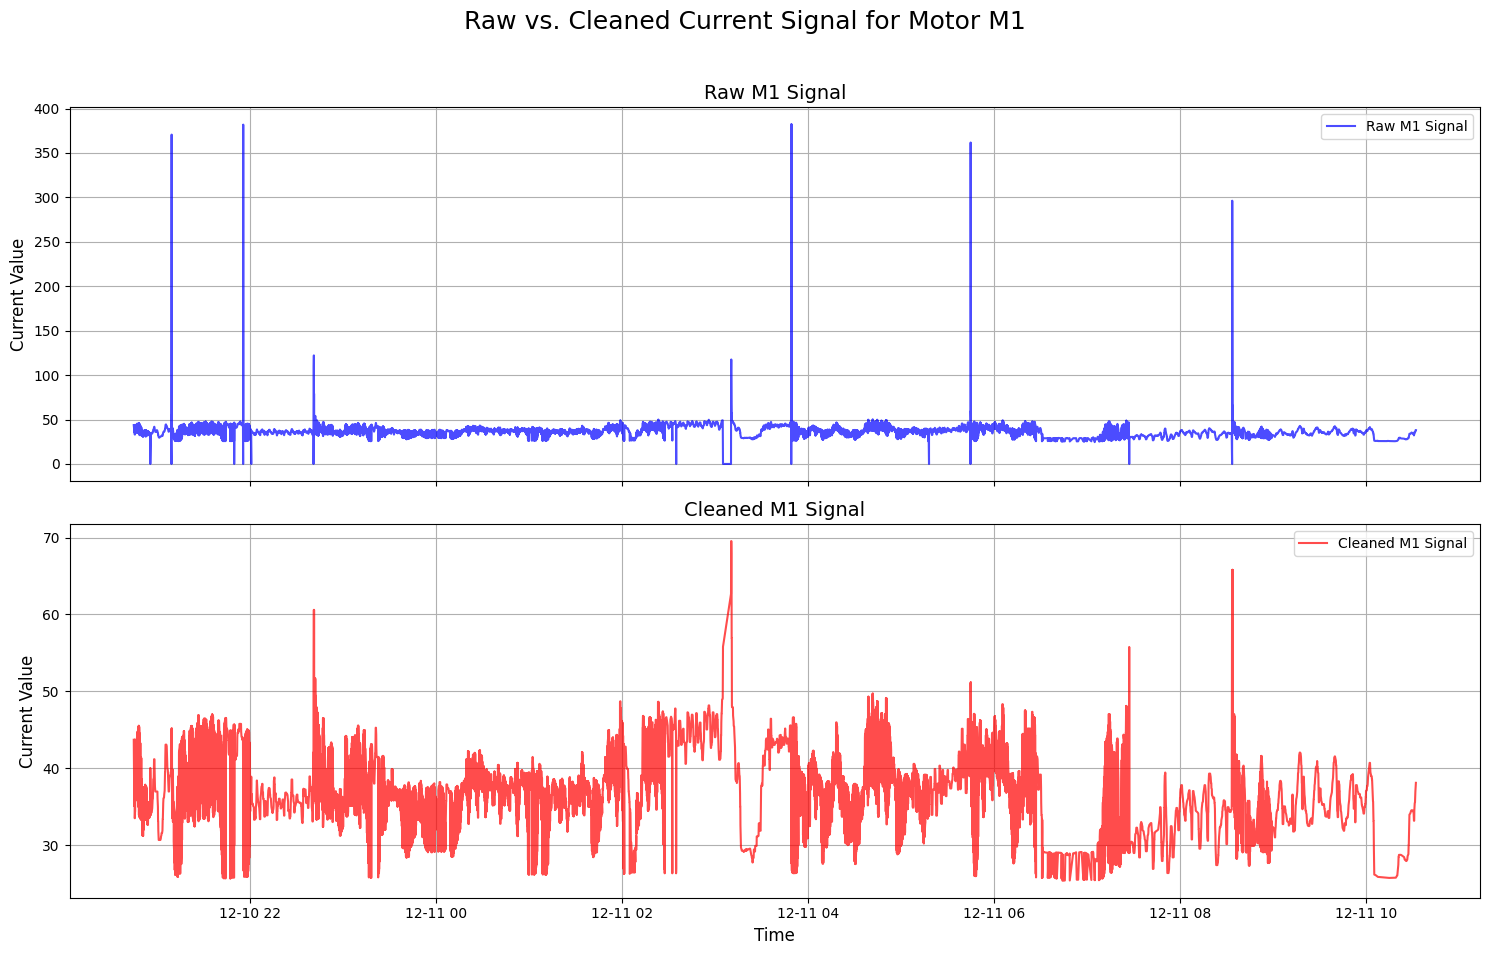

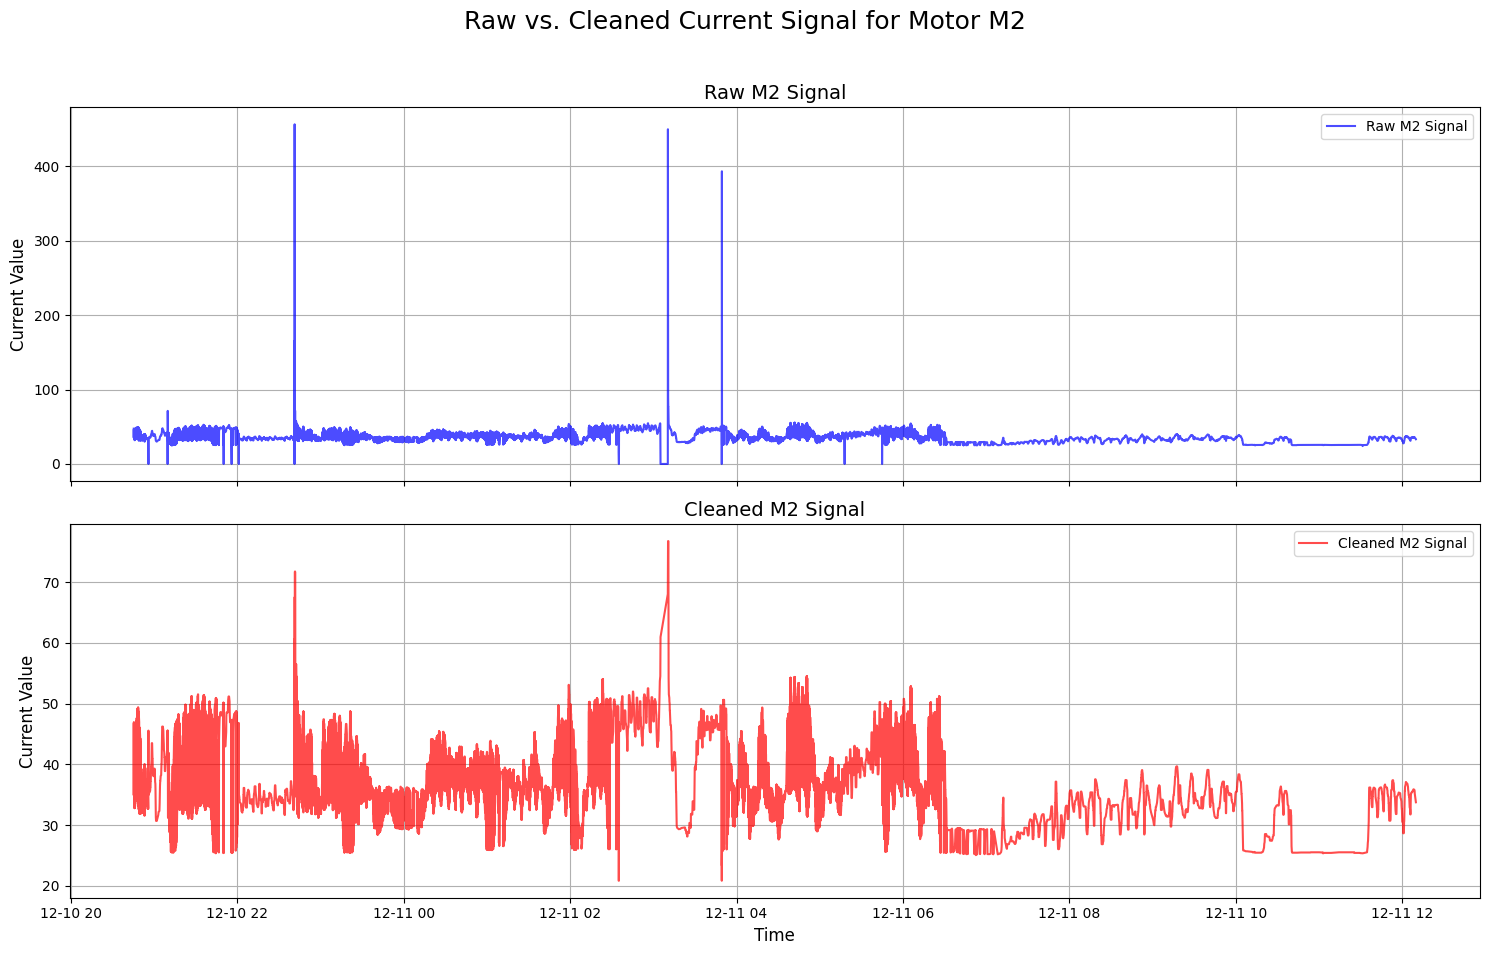

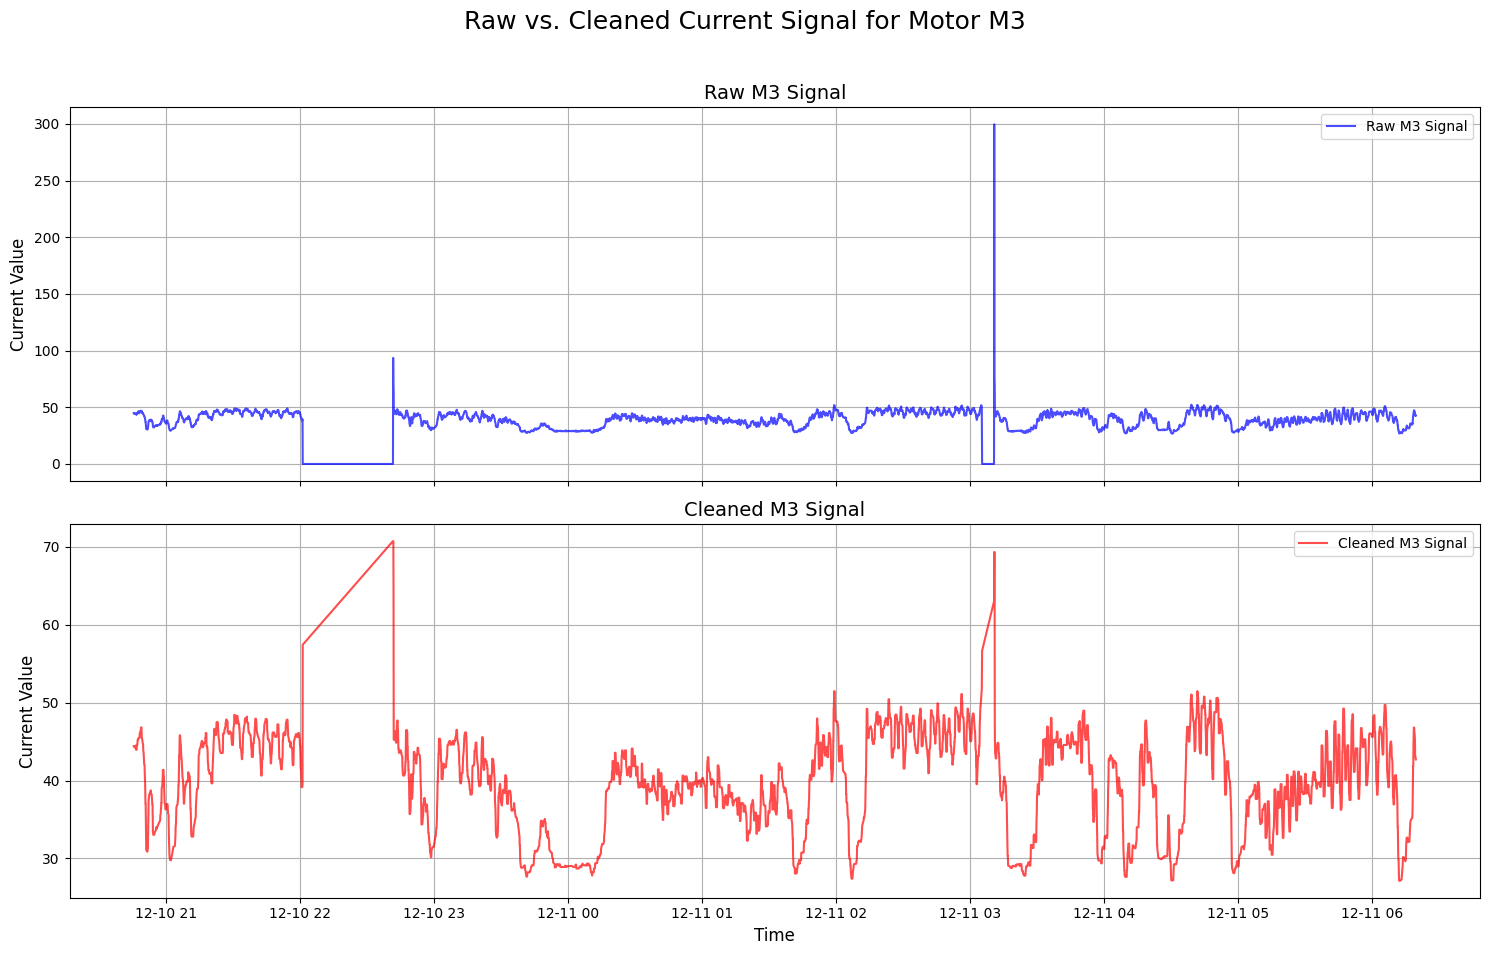

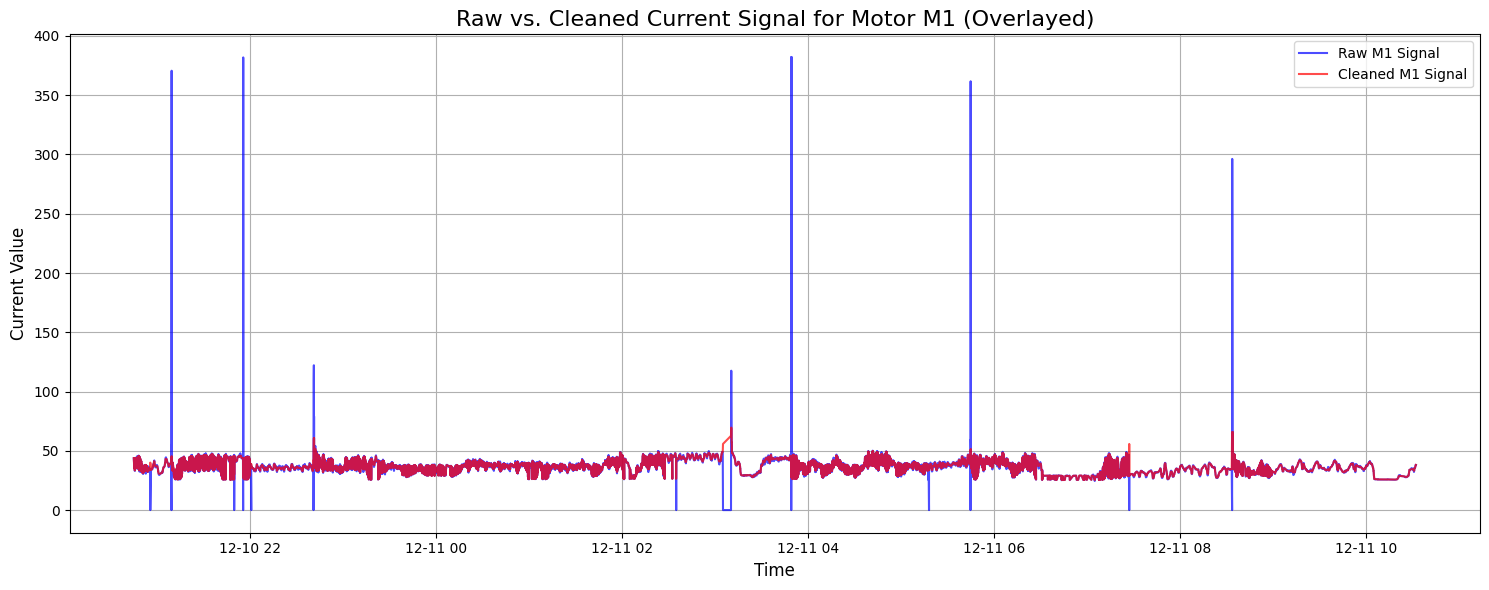

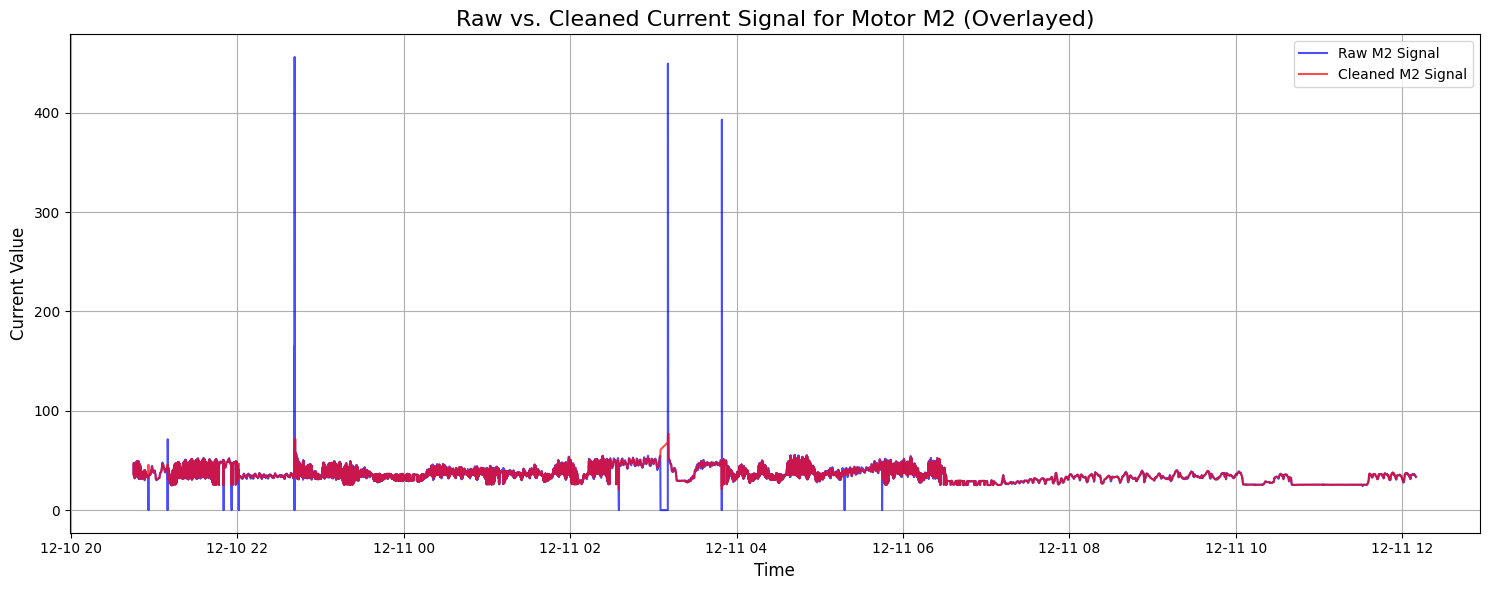

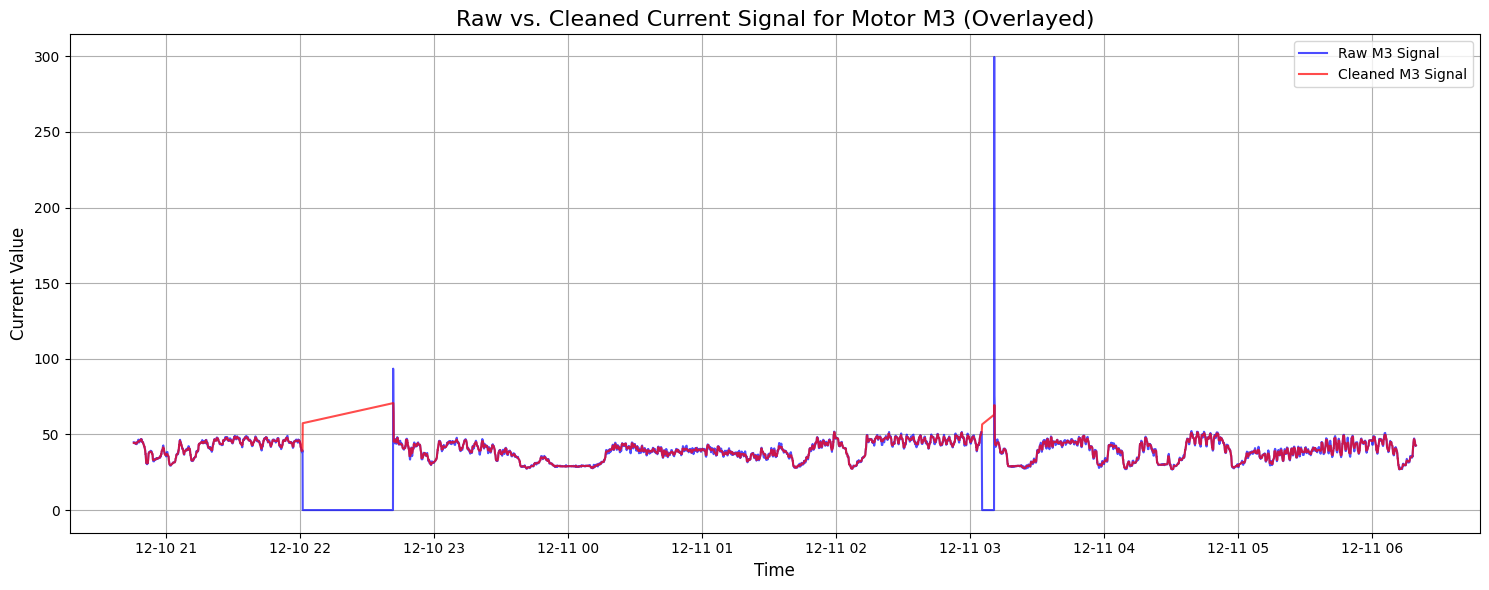

In [8]:
print("--- Visualizing Raw vs. Cleaned Data Comparison ---")

for motor_id in motor_ids_to_plot:
    # Filter raw data for the current motor
    raw_motor_df = df_filtered_motors[df_filtered_motors['Motor_ID'] == motor_id].sort_values(by='Time').copy()

    # Filter cleaned data for the current motor
    cleaned_motor_df = df_cleaned_motors[df_cleaned_motors['Motor_ID'] == motor_id].sort_values(by='Time').copy()

    # Create a figure with two subplots
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharex=True)
    fig.suptitle(f'Raw vs. Cleaned Current Signal for Motor {motor_id}', fontsize=18)

    # Plot raw data
    axes[0].plot(raw_motor_df['Time'], raw_motor_df['Value'], label=f'Raw {motor_id} Signal', color='blue', alpha=0.7)
    axes[0].set_title(f'Raw {motor_id} Signal', fontsize=14)
    axes[0].set_ylabel('Current Value', fontsize=12)
    axes[0].grid(True)
    axes[0].legend()

    # Plot cleaned data
    axes[1].plot(cleaned_motor_df['Time'], cleaned_motor_df['Filtered_Value'], label=f'Cleaned {motor_id} Signal', color='red', alpha=0.7)
    axes[1].set_title(f'Cleaned {motor_id} Signal', fontsize=14)
    axes[1].set_xlabel('Time', fontsize=12)
    axes[1].set_ylabel('Current Value', fontsize=12)
    axes[1].grid(True)
    axes[1].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust layout to prevent suptitle overlap
    plt.show()

# Optional: Plot raw and cleaned on the same graph for a different perspective
for motor_id in motor_ids_to_plot:
    raw_motor_df = df_filtered_motors[df_filtered_motors['Motor_ID'] == motor_id].sort_values(by='Time').copy()
    cleaned_motor_df = df_cleaned_motors[df_cleaned_motors['Motor_ID'] == motor_id].sort_values(by='Time').copy()

    plt.figure(figsize=(15, 6))
    plt.plot(raw_motor_df['Time'], raw_motor_df['Value'], label=f'Raw {motor_id} Signal', color='blue', alpha=0.7)
    plt.plot(cleaned_motor_df['Time'], cleaned_motor_df['Filtered_Value'], label=f'Cleaned {motor_id} Signal', color='red', alpha=0.7)
    plt.title(f'Raw vs. Cleaned Current Signal for Motor {motor_id} (Overlayed)', fontsize=16)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel('Current Value', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

## Summarize Sensor Issues and Justification

### Subtask:
Compile a detailed summary report documenting all sensor issues identified, the engineering logic and justification used to classify them as errors, and the specific methods applied for their correction or mitigation. This summary should reflect the perspective of a senior Condition Monitoring Engineer.


### Summary Report: Sensor Data Quality for TR22 Monitoring

**To:** Management/Operations Team

**From:** Senior Condition Monitoring Engineer

**Date:** [Current Date]

**Subject:** Assessment of Motor Current Sensor Data Quality and Cleaning Interventions for TR22 Motors (M1, M2, M3)

---

#### **1. Introduction**

This report details the findings from a data quality assessment performed on the motor current signals obtained from TR22_Monitoring_CMA.csv, focusing on motors M1, M2, and M3. The objective was to identify non-physical values, provide engineering justification for their classification as errors, and document the implemented data cleaning strategies. This analysis is crucial for ensuring the reliability of our condition monitoring data, which underpins critical maintenance decisions.

#### **2. Identified Sensor Issues and Engineering Justification**

During the initial data inspection and visualization of raw current signals, several types of non-physical values and anomalies were systematically identified across M1, M2, and M3. These issues suggest either sensor malfunctions, data acquisition system errors, or communication problems, rather than actual motor operational states.

**a. Zero-Value Dropouts**
*   **Observation:** Instances where the current signal abruptly drops to an exact 0.0 A were observed across all three motors (M1: 14 occurrences, M2: 12 occurrences, M3: 4 occurrences).
*   **Engineering Justification:** For an operational electric motor, a current reading of precisely 0.0 A is physically impossible unless the motor is completely de-energized and disconnected from the power supply, or has experienced a catastrophic internal failure leading to open-circuit conditions. Even during idle states or very light loads, motors draw a non-zero excitation or magnetizing current. Therefore, these exact zero readings are highly indicative of sensor failure (e.g., a disconnected sensor, a faulty current transformer), a data acquisition error, or a temporary communication dropout where a default 'zero' is reported. Such data points are considered erroneous and do not reflect true motor behavior.

**b. Impossible Current Spikes/Dips**
*   **Observation:** Significant current spikes exceeding 100.0 A were detected (M1: 11 occurrences, M2: 6 occurrences, M3: 1 occurrence). These values are substantially higher than the typical operating range (30-50 A) and the maximum observed normal current (~60 A). No impossible current dips (values between 0.0 A and 10.0 A) were identified, suggesting that when the motors are running, they generally maintain a current above a plausible idle threshold.
*   **Engineering Justification:** While motors can experience elevated currents during startup (inrush current) or transient overload conditions, these are typically dynamic events with a specific profile and duration. The observed spikes, often appearing instantaneously and without corresponding operational context (e.g., motor start command, known load transient), exceed typical operational limits and often bypass protection settings that would otherwise trip the motor. Such extreme, short-duration spikes are most likely attributable to external electromagnetic interference (EMI) affecting the sensor readings, transient glitches in the data acquisition system, or signal corruption during transmission, rather than actual electrical overloads. They introduce significant noise and distortion, making accurate condition assessment difficult.

**c. Communication Glitches (Flatlining)**
*   **Observation:** No extended flatline sequences (defined as 5 or more consecutive identical readings) were detected in the raw data for motors M1, M2, or M3. This indicates that while other issues exist, persistent sensor freezing or communication halts leading to prolonged unchanging values were not a predominant issue in this dataset, based on the defined threshold.
*   **Engineering Justification:** Flatlining, particularly at a constant non-zero value, typically signifies a frozen sensor output or a data communication channel stuck at its last valid reading. While not observed as a major issue here, the absence of such flatlines simplifies the data cleaning process by reducing the need for specific algorithms to detect and correct these prolonged static periods.

#### **3. Data Cleaning and Filtering Techniques Applied**

To mitigate the impact of the identified non-physical values and enhance the reliability of the current signals for condition monitoring, the following systematic cleaning and filtering techniques were applied:

1.  **Conversion to NaN:**
    *   All identified zero-value dropouts (exact 0.0 A readings) were replaced with `np.nan` to mark them as missing data, acknowledging their non-physical nature for an operating motor.
    *   Similarly, all impossible current spikes (values exceeding the `upper_threshold_spike` of 100.0 A) were also converted to `np.nan`, recognizing them as likely sensor/data acquisition artifacts.

2.  **Linear Interpolation:**
    *   After converting anomalous values to `np.nan`, linear interpolation (`method='linear'`) was applied to fill these missing data points. Interpolation estimates the missing values based on the adjacent valid data points, providing a smooth and physically plausible substitute. This method is effective for short-duration data gaps or spikes, maintaining the temporal characteristics of the signal.

3.  **Rolling Median Filter:**
    *   A rolling median filter with a `window_size` of 5 data points was subsequently applied to the interpolated signal. The median filter is particularly robust against outliers (spikes or dips that might have been too subtle to be caught by the thresholding or that remain after interpolation) and general signal noise, as it replaces each data point with the median of its neighbors. This significantly smooths the signal without distorting edges or introducing new frequencies, resulting in a more stable and representative current trend.

#### **4. Conclusion on Data Quality for Condition Monitoring**

In conclusion, the raw motor current data from TR22_Monitoring_CMA.csv presented notable quality issues, primarily characterized by non-physical zero-value dropouts and impossible current spikes. These anomalies, if left unaddressed, would severely compromise the accuracy of any condition monitoring analysis, potentially leading to false alarms, missed fault detections, or inaccurate trend predictions.

The implemented data cleaning strategy, involving the systematic identification and replacement of erroneous points with `np.nan`, followed by linear interpolation and robust rolling median filtering, has effectively transformed the raw, noisy signals into a significantly cleaner and more reliable dataset. The 'Before vs After' visualizations clearly demonstrate the success of these techniques in removing artifacts while preserving the underlying operational trends.

The `Filtered_Value` column now represents a robust and dependable data source suitable for advanced condition monitoring analytics, enabling more accurate assessment of motor health and performance. Continuous monitoring of data quality remains essential to promptly address any recurring or new sensor-related issues.

## Formulate Professional Conclusion

### Subtask:
Draft a professional-style conclusion suitable for a Condition Monitoring report. This conclusion should summarize the key findings regarding data quality, the integrity of the cleaned dataset, and any implications for the reliability assessment of the TR1050ML-22 motors.


### Professional Conclusion for Condition Monitoring Report

This analysis focused on the motor current signals from the `TR22_Monitoring_CMA.csv` dataset for the TR1050ML-22 motors, with the primary goal of data cleaning and preparing a robust dataset for condition monitoring.

**Summary of Data Quality Issues in Raw Data:**

Initial inspection and visualization of the raw current signals (M1, M2, M3) revealed significant data quality concerns. Key non-physical values identified include:

*   **Zero-Value Dropouts:** Numerous instances were observed where current readings abruptly dropped to exactly 0.0 Amperes. As an operating motor cannot draw zero current (even at idle, some excitation current is present), these readings were deemed sensor malfunctions, data acquisition errors, or communication failures rather than actual motor behavior.
*   **Impossible Current Spikes:** The raw data also contained current spikes significantly exceeding 100.0 Amperes, far beyond the typical operating range (30-50 A) and reasonable overcurrent limits for the motors. These instantaneous and extreme deviations, without any corresponding operational context, strongly indicate sensor noise, electromagnetic interference, or data corruption.

These anomalies rendered the raw dataset unsuitable for accurate condition monitoring, as they would lead to misinterpretations of motor health and operational status.

**Improvement in Data Integrity through Cleaning Process:**

The implemented data cleaning process significantly improved the integrity and reliability of the dataset. The strategy involved:

*   **Handling of Non-Physical Values:** All identified zero-value dropouts and impossible current spikes were systematically converted to `NaN` values, effectively marking them as erroneous data points.
*   **Interpolation:** Linear interpolation was applied to fill these `NaN` values. This technique intelligently estimates missing data points based on surrounding valid readings, maintaining the temporal continuity of the signals without introducing artificial trends.
*   **Rolling Median Filtering:** A rolling median filter with a window size of 5 was applied. This method is particularly effective at smoothing the data and mitigating remaining noise and smaller outliers that might not have been captured by the initial thresholding, resulting in a cleaner and more representative signal.

**Implications for Reliability Assessment of TR1050ML-22 Motors:**

The cleaned dataset now provides a far more accurate and reliable foundation for condition monitoring and reliability assessment of the TR1050ML-22 motors. By eliminating non-physical values and reducing noise, the cleaned data offers the following benefits:

*   **Enhanced Anomaly Detection:** True operational anomalies (e.g., increased current due to bearing wear, cavitation, or imbalance) can now be more accurately distinguished from data artifacts, leading to earlier and more precise fault detection.
*   **Improved Trend Analysis:** Trends in motor current, crucial indicators of motor degradation over time, are now clearer and less obscured by erroneous readings, allowing for better predictive maintenance scheduling.
*   **Reliable Performance Metrics:** Any performance metrics or diagnostic models built upon this cleaned data will be more robust and trustworthy, supporting data-driven decision-making.
*   **Optimized Maintenance Strategies:** With a higher confidence in the data, maintenance teams can transition from reactive to predictive maintenance, optimizing resource allocation, reducing downtime, and extending equipment lifespan. This ensures more cost-effective and efficient operation of the TR1050ML-22 motors.

In conclusion, the meticulous data cleaning process has transformed a noisy and unreliable raw dataset into a high-integrity data source. This cleaned data is indispensable for conducting accurate condition monitoring and making informed decisions regarding the reliability and maintenance of the TR1050ML-22 motors.

## Final Task

### Subtask:
Provide the cleaned dataset, the before vs. after trend comparison, the summary of sensor issues, and the professional conclusion.


## Summary:

### Data Analysis Key Findings

*   **Initial Data Quality Issues:** The raw dataset `TR22_Monitoring_CMA.csv` contained 186,104 entries with several quality problems.
    *   The `Time` and `Value` columns were initially loaded as `object` data types, requiring conversion to datetime and numeric types, respectively.
    *   **"Calc Failed" Values:** Approximately 4,158 entries in the `Value` column were non-numeric "Calc Failed" strings, necessitating their conversion to `NaN` for numerical processing.
    *   **Zero-Value Dropouts:** For operating motors, 14 instances for M1, 12 for M2, and 4 for M3 recorded an impossible exact 0.0 A current, indicating sensor malfunction, data acquisition errors, or communication issues.
    *   **Impossible Current Spikes:** M1 had 11, M2 had 6, and M3 had 1 instance of current values exceeding 100.0 A. These extreme, instantaneous spikes, far beyond the typical operating range of 30-50 A, were identified as likely sensor noise, EMI, or data corruption.
    *   **Absence of Other Issues:** No impossible current dips (between 0.0 A and 10.0 A) or extended flatline sequences (defined as 5 or more consecutive identical readings) were detected.

*   **Data Cleaning and Filtering Effectiveness:** A multi-step cleaning process successfully addressed the identified anomalies.
    *   Zero-value dropouts and current spikes above 100.0 A were replaced with `NaN`.
    *   Linear interpolation was applied to fill these `NaN` values, ensuring temporal continuity.
    *   A rolling median filter with a window size of 5 was used to smooth the data and further mitigate noise, resulting in a new 'Filtered\_Value' column.
    *   The cleaned data's descriptive statistics showed a mean current value of approximately 37.98 A, with a minimum of about 20.85 A and a maximum of about 76.77 A, indicating a more physically plausible range.
    *   Visual comparison plots clearly demonstrated the removal of spikes and dropouts, transforming raw, noisy signals into smoother, more representative trends.

*   **Impact on Condition Monitoring:** The cleaned dataset provides a significantly more reliable and accurate foundation for assessing motor health. It enables enhanced anomaly detection, improved trend analysis, and more trustworthy performance metrics, which are crucial for predictive maintenance strategies.

### Insights or Next Steps

*   **Proactive Sensor Health Monitoring:** Implement continuous monitoring of sensor output quality, including checks for 'Calc Failed' values, zero-value dropouts, and sudden inexplicable spikes, to identify and address sensor or data acquisition system malfunctions as they occur.
*   **Refine Thresholds with Operational Context:** Collaborate with operations teams to establish dynamic or context-specific thresholds for current spikes and dips, rather than static limits, to account for legitimate operational events like motor starts or load changes, further enhancing the accuracy of anomaly detection.
